# <div style="text-align:center">Выбор локации для скважины</div>

## Описание проекта.

- **Заказчик:**
«ГлавРосГосНефть».<br><br>

- **Введение:**<br>
Компании «ГлавРосГосНефть» необходимо решить, где бурить новую скважину.
  - Шаги для выбора локации:
    1. В избранном регионе ищут месторождения, для каждого определяют значения признаков;
    2. Строят модель и оценивают объём запасов;
    3. Выбирают месторождения с самым высокими оценками значений
    4. Прибыль равна суммарной прибыли отобранных месторождений.

  - Условия задачи:<br>
    - Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
    - При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
    - Бюджет на разработку скважин в регионе — 10 млрд рублей.
    - При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
    - После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
    
    Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.<br><br>

- **Описание данных:**<br>
  Пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.

  - **Источник(и) данных:**<br>
Данные геологоразведки трёх регионов:<br>
    - [Данные по региону 0](https://code.s3.yandex.net/datasets/geo_data_0.csv),<br>
    - [Данные по региону 1](https://code.s3.yandex.net/datasets/geo_data_1.csv),<br>
    - [Данные по региону 2](https://code.s3.yandex.net/datasets/geo_data_2.csv).

  - **Описание признаков:**<br>
    - `id` — уникальный идентификатор скважины;
    - `f0`, `f1`, `f2` — три характеристики каждой скважины (неважно, что они означают, но сами признаки значимы);
    - `product` — объём запасов в скважине (тыс. баррелей).
  <br><br>

- **Цели и план работы:**
  - **Цели работы:**
    - построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль;
    - проанализировать возможную прибыль и риски техникой *Bootstrap.*

  - **План работы:**
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта." data-toc-modified-id="Описание-проекта.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта.</a></span><ul class="toc-item"><li><span><a href="#Итог-работы." data-toc-modified-id="Итог-работы.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Итог работы.</a></span></li></ul></li><li><span><a href="#Загрузка-используемых-библиотек." data-toc-modified-id="Загрузка-используемых-библиотек.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка используемых библиотек.</a></span></li><li><span><a href="#Установка-параметров." data-toc-modified-id="Установка-параметров.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Установка параметров.</a></span></li><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Общая-информация-о-данных." data-toc-modified-id="Общая-информация-о-данных.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общая информация о данных.</a></span><ul class="toc-item"><li><span><a href="#Создание-функций-для-ИАД." data-toc-modified-id="Создание-функций-для-ИАД.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Создание функций для ИАД.</a></span></li><li><span><a href="#Вывод-общей-информации-о-данных." data-toc-modified-id="Вывод-общей-информации-о-данных.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод общей информации о данных.</a></span></li><li><span><a href="#Общая-информация-о-данных.-Выводы." data-toc-modified-id="Общая-информация-о-данных.-Выводы.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Общая информация о данных. Выводы.</a></span><ul class="toc-item"><li><span><a href="#Информация-о-составе-датафреймов." data-toc-modified-id="Информация-о-составе-датафреймов.-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Информация о составе датафреймов.</a></span></li><li><span><a href="#Признаки." data-toc-modified-id="Признаки.-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Признаки.</a></span></li><li><span><a href="#Задача-построения-модели." data-toc-modified-id="Задача-построения-модели.-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Задача построения модели.</a></span></li><li><span><a href="#Пропуски-в-данных." data-toc-modified-id="Пропуски-в-данных.-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Пропуски в данных.</a></span></li><li><span><a href="#Аномалии-в-данных." data-toc-modified-id="Аномалии-в-данных.-5.3.5"><span class="toc-item-num">5.3.5&nbsp;&nbsp;</span>Аномалии в данных.</a></span></li><li><span><a href="#Дубликаты-в-данных." data-toc-modified-id="Дубликаты-в-данных.-5.3.6"><span class="toc-item-num">5.3.6&nbsp;&nbsp;</span>Дубликаты в данных.</a></span></li><li><span><a href="#Распределения-признаков." data-toc-modified-id="Распределения-признаков.-5.3.7"><span class="toc-item-num">5.3.7&nbsp;&nbsp;</span>Распределения признаков.</a></span></li><li><span><a href="#Корреляция-признаков-/-мультиколлинеарность." data-toc-modified-id="Корреляция-признаков-/-мультиколлинеарность.-5.3.8"><span class="toc-item-num">5.3.8&nbsp;&nbsp;</span>Корреляция признаков / мультиколлинеарность.</a></span></li></ul></li></ul></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Обработка-дубликатов." data-toc-modified-id="Обработка-дубликатов.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Обработка дубликатов.</a></span><ul class="toc-item"><li><span><a href="#Удаление-дубликатов." data-toc-modified-id="Удаление-дубликатов.-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Удаление дубликатов.</a></span></li></ul></li><li><span><a href="#Удаление-неинформативного-признака." data-toc-modified-id="Удаление-неинформативного-признака.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Удаление неинформативного признака.</a></span></li><li><span><a href="#Предобработка-данных.-Выводы." data-toc-modified-id="Предобработка-данных.-Выводы.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Предобработка данных. Выводы.</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели." data-toc-modified-id="Обучение-и-проверка-модели.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение и проверка модели.</a></span><ul class="toc-item"><li><span><a href="#Создание-функции." data-toc-modified-id="Создание-функции.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Создание функции.</a></span></li><li><span><a href="#Обучение-и-проверка-модели." data-toc-modified-id="Обучение-и-проверка-модели.-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Обучение и проверка модели.</a></span></li><li><span><a href="#Обучение-и-проверка-модели.-Выводы." data-toc-modified-id="Обучение-и-проверка-модели.-Выводы.-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Обучение и проверка модели. Выводы.</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли." data-toc-modified-id="Подготовка-к-расчёту-прибыли.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Подготовка к расчёту прибыли.</a></span><ul class="toc-item"><li><span><a href="#Определение-констант,-указанных-в-ТЗ." data-toc-modified-id="Определение-констант,-указанных-в-ТЗ.-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Определение констант, указанных в ТЗ.</a></span></li><li><span><a href="#Расчёт-достаточного-объёма-сырья." data-toc-modified-id="Расчёт-достаточного-объёма-сырья.-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Расчёт достаточного объёма сырья.</a></span></li><li><span><a href="#Подготовка-к-рассчёту-прибыли.-Выводы." data-toc-modified-id="Подготовка-к-рассчёту-прибыли.-Выводы.-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Подготовка к рассчёту прибыли. Выводы.</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Функция-расчёта-прибыли." data-toc-modified-id="Функция-расчёта-прибыли.-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Функция расчёта прибыли.</a></span></li><li><span><a href="#Рассчёт-средней-прибыли,-доверительного-интервала-и-риска-убытков." data-toc-modified-id="Рассчёт-средней-прибыли,-доверительного-интервала-и-риска-убытков.-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Рассчёт средней прибыли, доверительного интервала и риска убытков.</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков.-Выводы:" data-toc-modified-id="Расчёт-прибыли-и-рисков.-Выводы:-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Расчёт прибыли и рисков. Выводы:</a></span></li></ul></li><li><span><a href="#Общие-выводы:" data-toc-modified-id="Общие-выводы:-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Общие выводы:</a></span><ul class="toc-item"><li><span><a href="#Моделирование." data-toc-modified-id="Моделирование.-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Моделирование.</a></span></li><li><span><a href="#Информация-о-составе-датафреймов." data-toc-modified-id="Информация-о-составе-датафреймов.-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Информация о составе датафреймов.</a></span></li><li><span><a href="#Обучение-и-проверка-модели." data-toc-modified-id="Обучение-и-проверка-модели.-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Обучение и проверка модели.</a></span></li><li><span><a href="#Расчёт-прибыли,-95%-го-доверительного-интервала-и-рисков-убытков." data-toc-modified-id="Расчёт-прибыли,-95%-го-доверительного-интервала-и-рисков-убытков.-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Расчёт прибыли, 95%-го доверительного интервала и рисков убытков.</a></span></li><li><span><a href="#Регион,-в-котором-рекомендуется-бурить-новые-скважины:-Регион-1." data-toc-modified-id="Регион,-в-котором-рекомендуется-бурить-новые-скважины:-Регион-1.-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Регион, в котором рекомендуется бурить новые скважины: <code>Регион 1</code>.</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>
<br>

### Итог работы.
Регион, в котором рекомендуется бурить новые скважины: `Регион 1`.
- Риск убытков в данном регионе ниже порога убыточности `2.5%`.
- Данный регион имеет наибольшую среднюю прибыль.
- Параметры данного региона:
  - `Регион 1` | `geo_data_1.csv`.
  - Средняя прибыль: `~539 млн.руб`.
  - `95%` доверительный интервал: `(~135 млн.руб. , ~954 млн.руб.)`.
  - Риск убытков: `0.4%`.

## Загрузка используемых библиотек.

In [1]:
### Работа с датафреймами.
# pandas для работы с датафреймами.
!pip install pandas --upgrade
import pandas as pd
# Функции проверки типа столбцов.
from pandas.api.types import is_numeric_dtype, is_string_dtype

### numpy для вычислений.
import numpy as np

### Визуализация.
# matplotlib для визуализации.
!pip install matplotlib --upgrade
import matplotlib.pyplot as plt
# seaborn для построения графиков.
import seaborn as sns

### Функции для работы с моделями.
## Функция масштабирования - StandardScaler.
from sklearn.preprocessing import StandardScaler
## Функция составления конвеера.
from sklearn.pipeline import Pipeline
## train_test_split для разделения на выборки.
from sklearn.model_selection import train_test_split
## Метрики для анализа моделей.
from sklearn.metrics import r2_score, mean_squared_error
## Модель регрессии.
from sklearn.linear_model import LinearRegression

### os для обращения к среде разработки и requests для интернет запросов.
import os
import requests

### tqdm для контроля выполнения ячеек.
from tqdm.notebook import tqdm
from tqdm import trange

### HTML для настройки отображения эл-тов.
from IPython.core.display import HTML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Unins

## Установка параметров.

In [2]:
# Установим стиль отображения заголовков таблиц.
styles = [
    dict(selector='caption',
         props=[('text-align', 'center'),
                ('font-size', '130%'),
                ('font-weight', 'bold'),
                ('white-space', 'pre-wrap')]),
    dict(selector="th",
         props=[('max-width', '200px')])
    ]

# Установим отображение всех столбцов при выводе датафрейма.
pd.set_option('display.max_columns', None)

# Зафиксируем начальное значение генератора псевдослучайных чисел.
seed = 42

# Установим отображение графиков по центру ячейки
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Загрузка данных.

- Функция загрузки и записи в переменные любого количества датасетов в формате `.csv` с проверкой адреса/пути.

In [3]:
# Функция загрузки и записи в переменные любого количества датасетов
# по ссылкам или пути с проверкой адреса/пути.
def fetch_datasets(pths, separator=','):
    '''Arguments:
    - pths: str, list. Full string path in quotes or list of links or
    list of file paths as list of strings.
    - separator: str, default=','. Separator as a string.
    - Example: ('/datasets/file.csv' or ['https://datasets/file.csv'], 't').
    '''

    # Переведём путь в список при необходимости.
    pths = [pths] if isinstance(pths, str) else pths

    print("\n\033[1m",
          'Начало загрузки и записи датасетов в переменные:',
          "\033[0m")

    for pth in tqdm(pths):
        # Запишем название и расширение файла.
        full_name = os.path.basename(pth)
        name, extension = os.path.splitext(full_name)

        # Проверим ссылку и запишем датасет в переменную.
        if 'http' in pth:
            # Воспользуемся try/except для непредвиденных ошибок.
            try:
                # Проверим корректность ссылки.
                if requests.get(pth).status_code == 200:
                    # Создадим переменную и запишем в неё датафрейм.
                    globals()[name.lower()] = pd.read_csv(pth, sep=separator)
                    print(f'Файл {full_name} прочитан и записан в переменную ',
                          f'"{name.lower()}". \nПуть к файлу: \n{pth}')
                    print('~' * 60)
                else:
                    print(f'Ошибка чтения файла по пути: {pth}')
                    print('~' * 60)
            except:
                print(f'Ошибка чтения файла по пути: {pth}')

        # Проверим путь и запишем датасет в переменную.
        elif os.path.exists(pth):
            # Создадим переменную и запишем в неё датафрейм.
            globals()[name.lower()] = pd.read_csv(pth, sep=separator)
            print(f'Файл {full_name} прочитан и записан в переменную ',
                  f'"{name.lower()}". \nПуть к файлу: \n{pth}')
            print('~' * 60)

        else:
            print(f'Ошибка чтения файла по пути: {pth}.')
            print('~' * 60)

- Вызовем функцию и загрузим данные.

In [4]:
fetch_datasets(['https://code.s3.yandex.net/datasets/geo_data_0.csv',
                'https://code.s3.yandex.net/datasets/geo_data_1.csv',
                'https://code.s3.yandex.net/datasets/geo_data_2.csv'])


 Начало загрузки и записи датасетов в переменные: 


  0%|          | 0/3 [00:00<?, ?it/s]

Файл geo_data_0.csv прочитан и записан в переменную  "geo_data_0". 
Путь к файлу: 
https://code.s3.yandex.net/datasets/geo_data_0.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Файл geo_data_1.csv прочитан и записан в переменную  "geo_data_1". 
Путь к файлу: 
https://code.s3.yandex.net/datasets/geo_data_1.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Файл geo_data_2.csv прочитан и записан в переменную  "geo_data_2". 
Путь к файлу: 
https://code.s3.yandex.net/datasets/geo_data_2.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


- Объявим переменные для систем проверки кода, не распознающих динамическое объявление.

In [5]:
# Объявим переменные для систем проверки кода, не распознающих
# динамическое объявление.
geo_data_0 = geo_data_0
geo_data_1 = geo_data_1
geo_data_2 = geo_data_2

## Общая информация о данных.

### Создание функций для ИАД.

- Введём функцию рассчёта и вывода процентов выбросов для отобранных признаков. <br>
Выбросы определим как значения вне 1.5 интерквартильных размаха.

In [6]:
### Введём функцию рассчёта и вывода процентов выбросов для
# отобранных признаков.
def get_outliers_ratio(data, col):
    distr = data[col].describe()
    distr_iqr = distr[6] - distr[4]
    whisker_upp = distr[6] + 1.5 * distr_iqr
    whisker_low = distr[4] - 1.5 * distr_iqr
    if whisker_upp >= distr[7]:
        whisker_upp = distr[7]
    if whisker_low <= distr[3]:
        whisker_low = distr[3]
    else:
        pass
    outliers_ratio = (
        (data.loc[data[col] >
                whisker_upp, col].count() +
        data.loc[data[col] <
                whisker_low, col].count()) /
        len(data[col])
    )
    return outliers_ratio

- Введём функцию вывода общей информации о данных.

In [7]:
### Введём функцию вывода информации о датафрейме.
def get_eda_data(data, data_name='Датафрейм'):

    # Отделим численные признаки.
    cols_to_analyze = [col for col in data if is_numeric_dtype(data[col])]

    # Выведем первые строки датафрейма.
    display(
        data.head(20)
        .style
        .set_caption(f'{data_name}.' +
                     '\nПервые 20 строк.')
        .set_table_styles(styles)
        )

    print('\n')

    # Вычислим кол-во нулевых значений в датафрйеме.
    zeros = []
    for col in data:
        zeros.append(len([el for el in data[col] if el == 0]))

    zeros = pd.Series(zeros, index=list(data.columns))

    # Выведем информацию о дубликатах, уникальных значениях
    # и пропусках в датафрейме.
    display(
        pd.DataFrame(
            data=[
                data.isna().sum(),
                round(data.isna().sum() / len(data), 4).map('{:.2%}'.format),
                len(data) - data.nunique(),
                (
                    round((len(data) - data.nunique()) / len(data), 4)
                    .map('{:.2%}'.format)
                ),
                data.nunique(),
                zeros
                 ],
            index=['Кол-во пропусков:', 'Процент пропусков:',
                   'Кол-во дубликатов:', 'Процент дубликатов:',
                   'Кол-во уникальных значений:', 'Кол-во нулевых значений:']
                   )
        .style
        .set_caption('Пропуски, уникальные значения и дубликаты в датафрейме.' +
                    '\n Количество явных дубликатов:  ' +
                    f'{data.duplicated().sum()}. \n')
        .set_table_styles(styles)
        )

    # Выведем информацию о составе датафрейма.
    print('\033[1m \n Информация о составе датафрейма. \033[0m')
    display(data.info())


    print('\n')

    # Выведем распределение признаков.
    display(
        data.describe([.05,.1,.25,.50,.75,.90,0.95])
        .style
        .format(precision=2)
        .set_caption(f'Распределение численных признаков.')
        .set_table_styles(styles)
        )

    print('\n')

    # Проверка наличия признаков 'bool' или 'object'
    col_types = [str(data[col].dtype) for col in data]
    if any(t in col_types for t in ['object', 'bool']):
        display(
            data.describe(include=['object', 'bool'])
            .style
            .set_caption(f'Информация о строковых признаках.')
            .set_table_styles(styles)
            )

        print('\n')

    ## Выведем значения матрицы корреляции.
    display(data[cols_to_analyze]
            .corr()
            .style
            .background_gradient(cmap='YlOrRd')
            .format(precision=2)
            .set_caption('Матрица корреляции.\n(Коэффициенты Пирсона.)')
            .set_table_styles(styles)
        )

    print('\n')

- Введём функцию вывода графиков.

In [8]:
### Введём функцию вывода графиков.
def get_eda_info(data):
    # Выделим численные признаки.
    cols_to_analyze = [col for col in data if is_numeric_dtype(data[col])]

    # Проверим наличие перевода названий и добавим известные
    # при необходимости.
    try:
        names_rus
    except:
        globals()['names_rus'] = {el : el for el in list(data.columns)}
        names_rus.update({'product' : 'Кол-во баррелей в тыс.'})

    ## Выведем гистограммы и диаграммы размаха.
    for col in cols_to_analyze:
        data.rename(columns={col : names_rus[col]}, inplace=True)
        fig, axes = plt.subplots(1,2, figsize=(15, 5))
        fig.suptitle(f'Признак "{col}".' +
                     '\nОбщий процент аномальных значений' +
                     f' ≈ {get_outliers_ratio(data, names_rus[col]):.2%}')
        sns.histplot(data=data, x=names_rus[col], ax=axes[0])
        axes[0].set_xlabel(names_rus[col])
        axes[0].set_ylabel('Количество')
        sns.boxplot(data=data, y=names_rus[col], ax=axes[1])
        axes[1].set_ylabel(names_rus[col])
        plt.show();
        data.rename(columns={names_rus[col] : col}, inplace=True)

### Вывод общей информации о данных.
Вызовем функции и выведем информацию и графики.

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


,id,f0,f1,f2,product
Кол-во пропусков:,0,0,0,0,0
Процент пропусков:,0.00%,0.00%,0.00%,0.00%,0.00%
Кол-во дубликатов:,10,0,0,0,0
Процент дубликатов:,0.01%,0.00%,0.00%,0.00%,0.00%
Кол-во уникальных значений:,99990,100000,100000,100000,100000
Кол-во нулевых значений:,0,0,0,0,1


 
 Информация о составе датафрейма. 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
5%,-0.94,-0.51,-2.86,24.02
10%,-0.79,-0.44,-1.70,32.59
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
90%,1.79,0.94,6.70,152.65


,id
count,100000
unique,99990
top,fiKDv
freq,2


,f0,f1,f2,product
f0,1.00,-0.44,-0.00,0.14
f1,-0.44,1.00,0.00,-0.19
f2,-0.00,0.00,1.00,0.48
product,0.14,-0.19,0.48,1.00


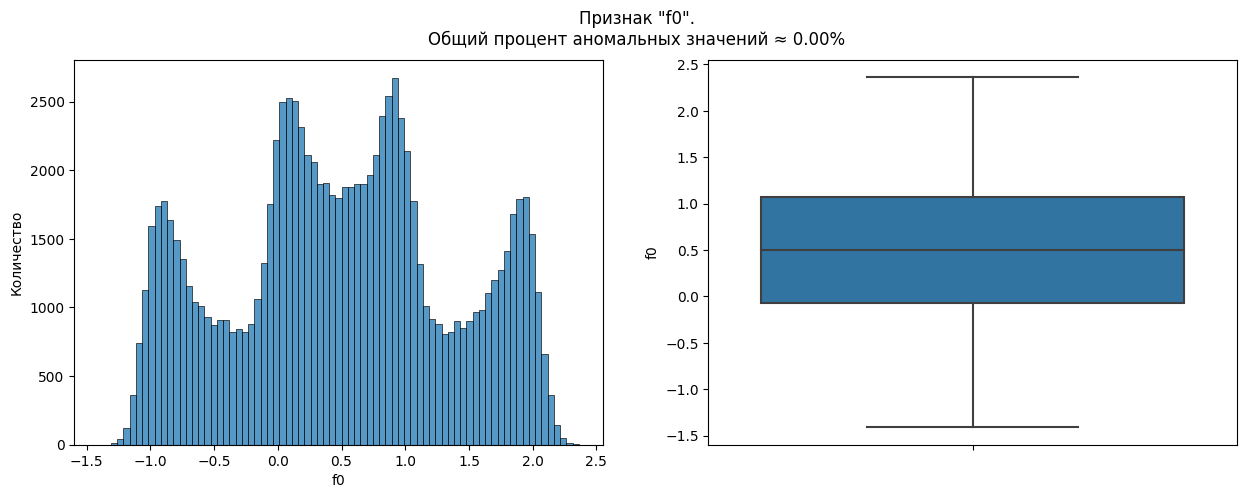

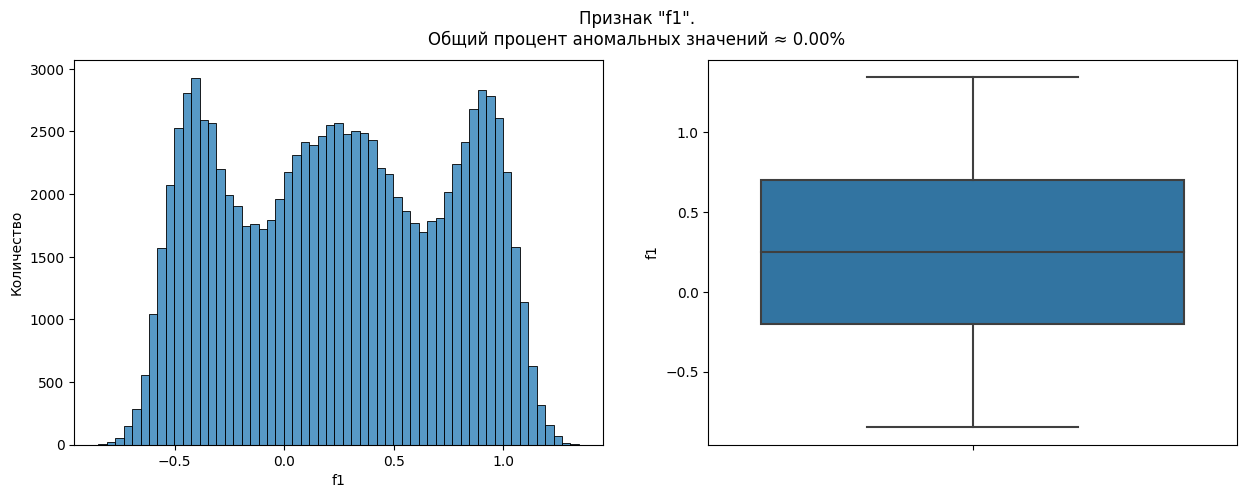

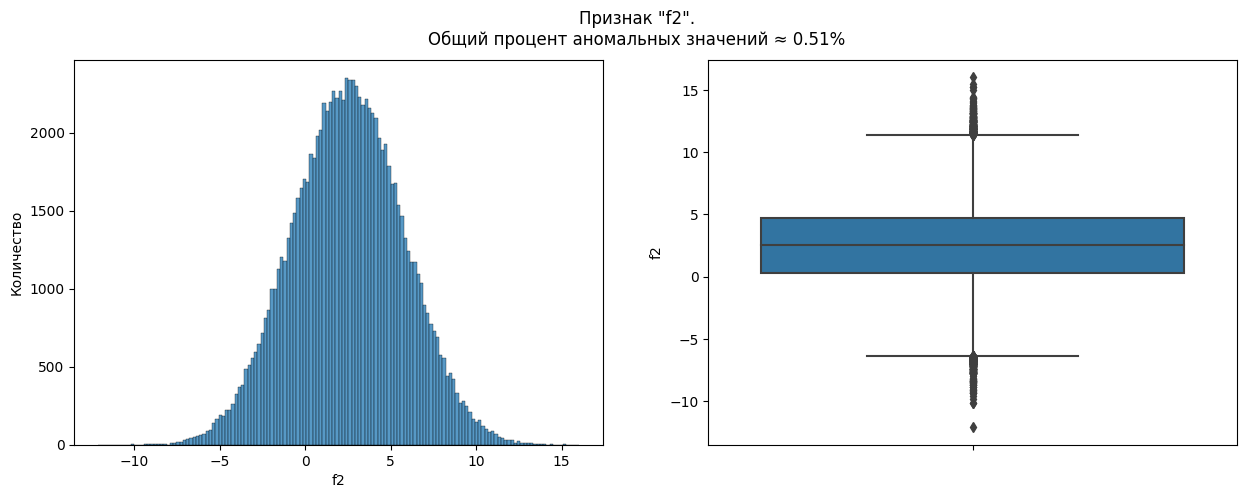

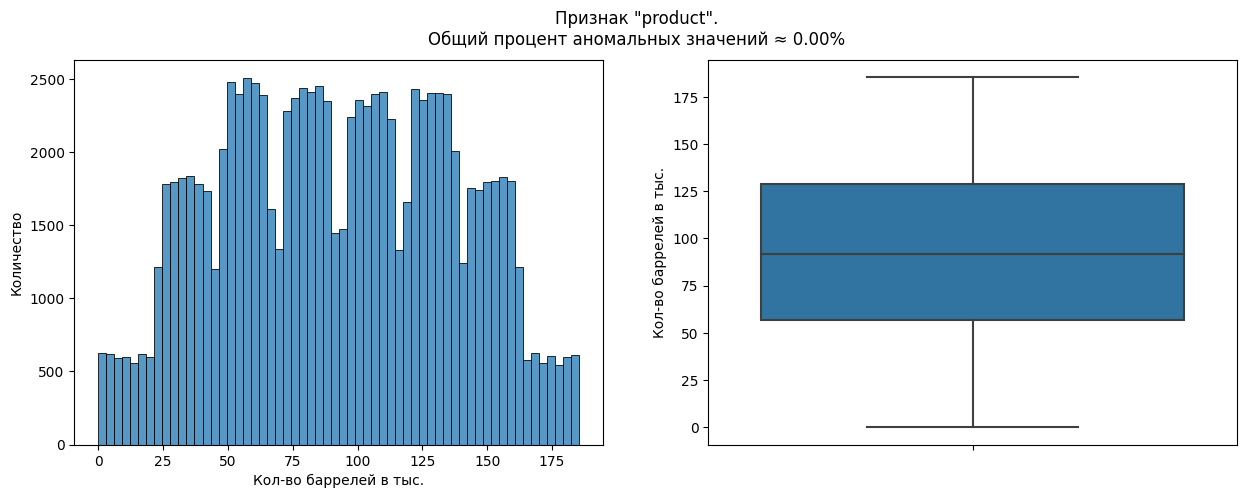

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


,id,f0,f1,f2,product
Кол-во пропусков:,0,0,0,0,0
Процент пропусков:,0.00%,0.00%,0.00%,0.00%,0.00%
Кол-во дубликатов:,4,0,0,0,99988
Процент дубликатов:,0.00%,0.00%,0.00%,0.00%,99.99%
Кол-во уникальных значений:,99996,100000,100000,100000,12
Кол-во нулевых значений:,0,0,0,0,8235


 
 Информация о составе датафрейма. 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,1.14,-4.80,2.49,68.83
std,8.97,5.12,1.70,45.94
min,-31.61,-26.36,-0.02,0.00
5%,-12.71,-13.19,-0.00,0.00
10%,-10.49,-11.36,0.00,3.18
25%,-6.30,-8.27,1.00,26.95
50%,1.15,-4.81,2.01,57.09
75%,8.62,-1.33,4.00,107.81
90%,12.77,1.78,5.00,134.77


,id
count,100000
unique,99996
top,wt4Uk
freq,2


,f0,f1,f2,product
f0,1.00,0.18,-0.00,-0.03
f1,0.18,1.00,-0.00,-0.01
f2,-0.00,-0.00,1.00,1.00
product,-0.03,-0.01,1.00,1.00


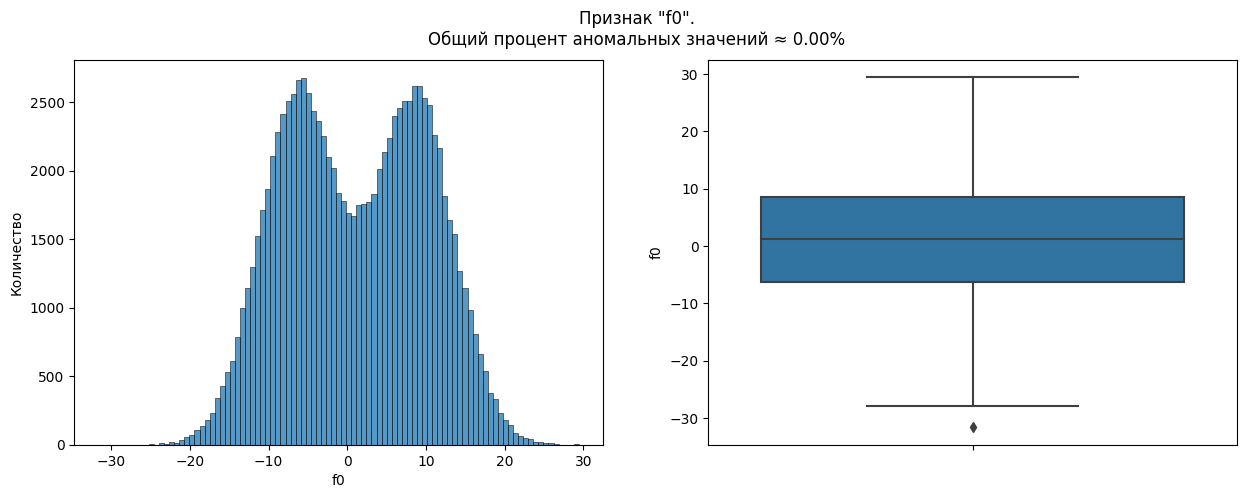

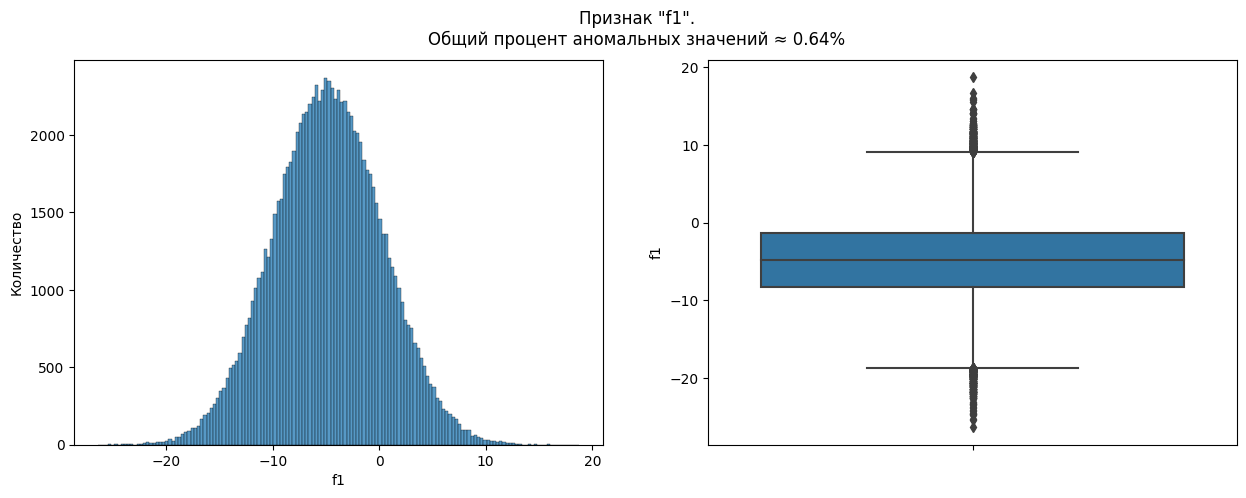

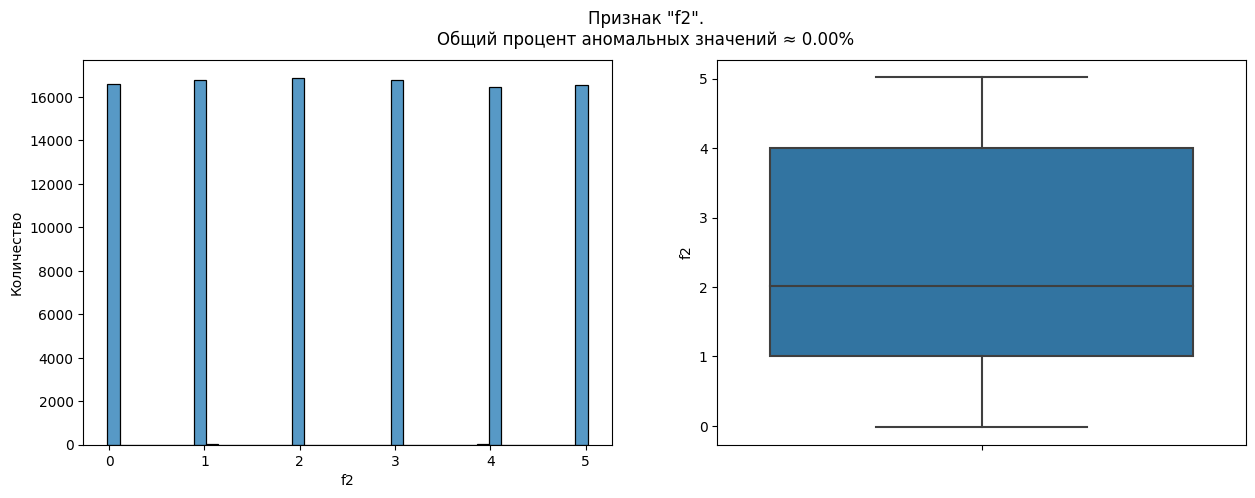

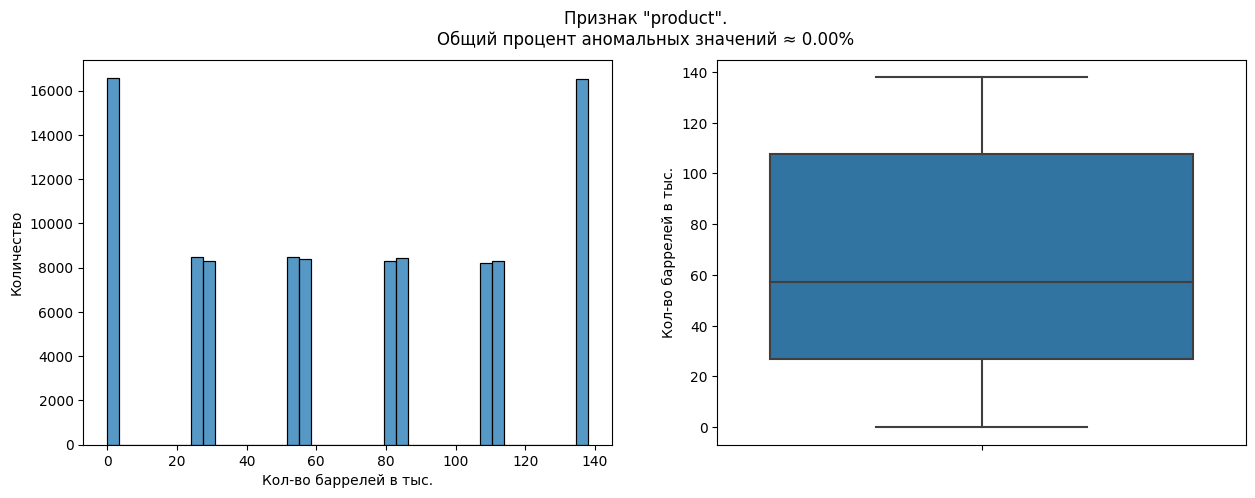

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


,id,f0,f1,f2,product
Кол-во пропусков:,0,0,0,0,0
Процент пропусков:,0.00%,0.00%,0.00%,0.00%,0.00%
Кол-во дубликатов:,4,0,0,0,0
Процент дубликатов:,0.00%,0.00%,0.00%,0.00%,0.00%
Кол-во уникальных значений:,99996,100000,100000,100000,100000
Кол-во нулевых значений:,0,0,0,0,1


 
 Информация о составе датафрейма. 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.00,-0.00,2.50,95.00
std,1.73,1.73,3.47,44.75
min,-8.76,-7.08,-11.97,0.00
5%,-2.85,-2.84,-3.19,24.68
10%,-2.22,-2.21,-1.97,34.59
25%,-1.16,-1.17,0.13,59.45
50%,0.01,-0.01,2.48,94.93
75%,1.16,1.16,4.86,130.60
90%,2.23,2.22,6.97,155.39


,id
count,100000
unique,99996
top,VF7Jo
freq,2


,f0,f1,f2,product
f0,1.00,0.00,-0.00,-0.00
f1,0.00,1.00,0.00,-0.00
f2,-0.00,0.00,1.00,0.45
product,-0.00,-0.00,0.45,1.00


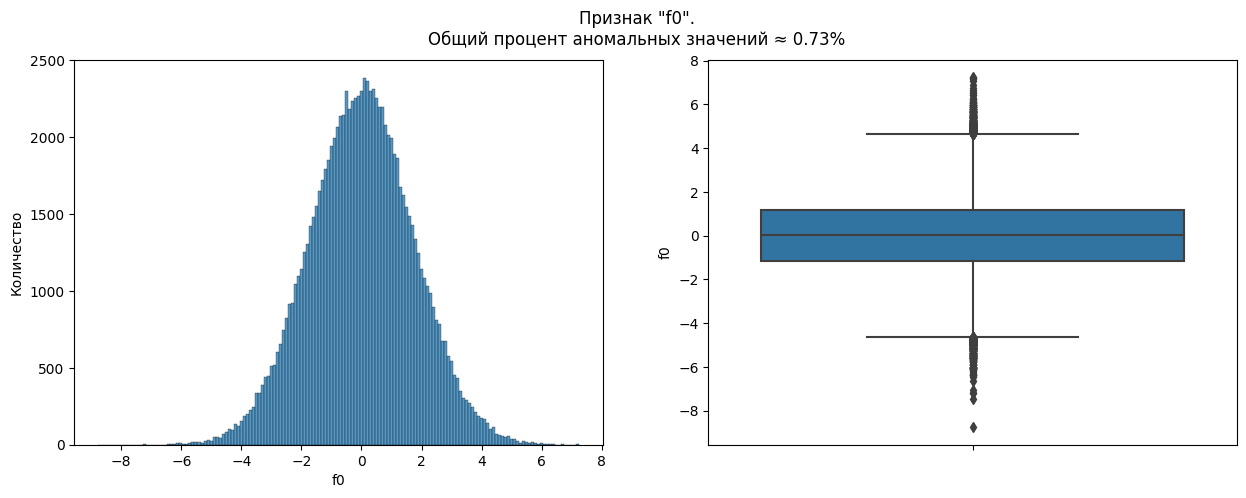

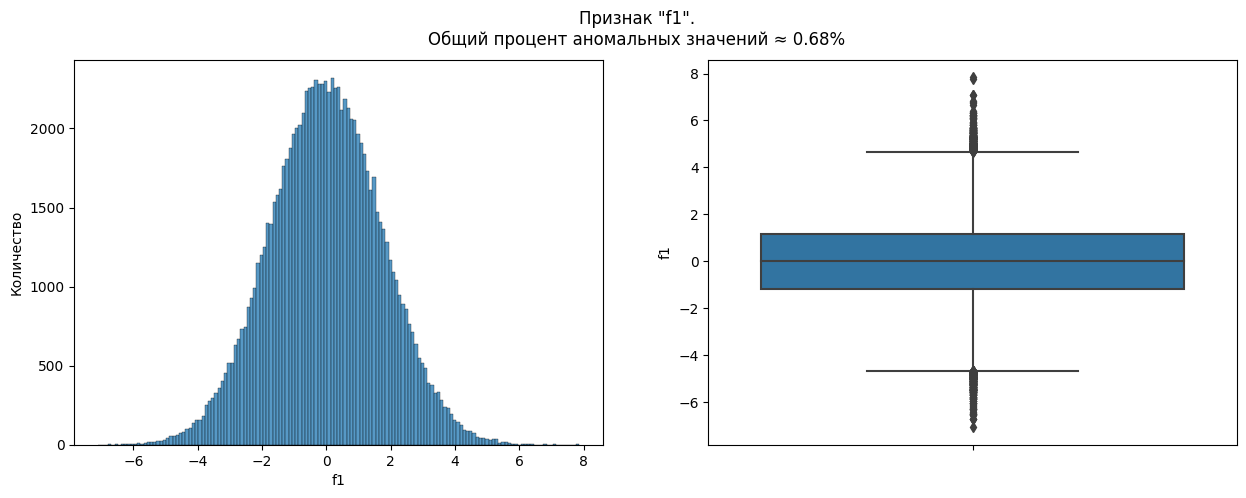

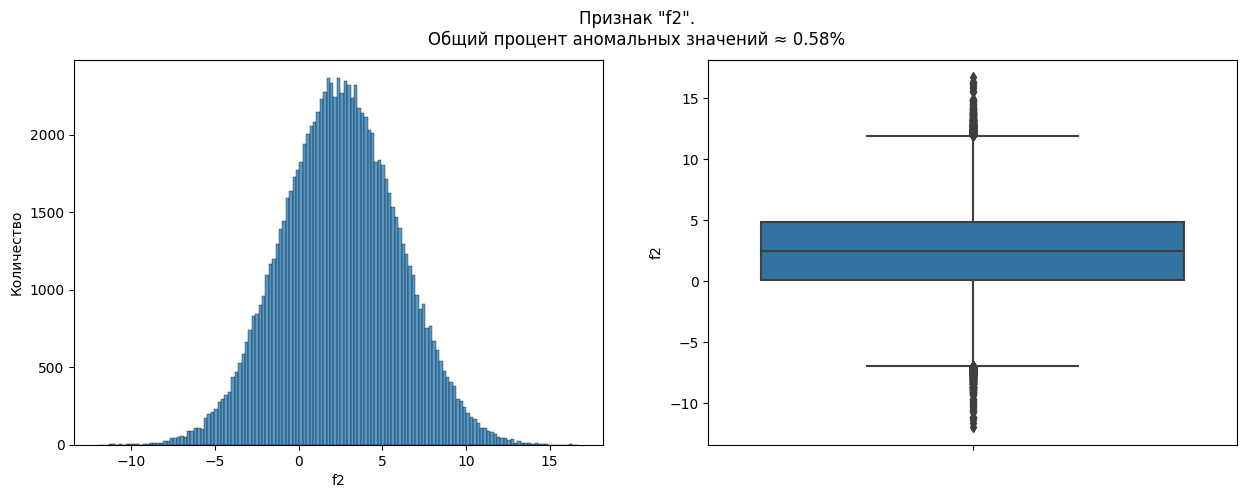

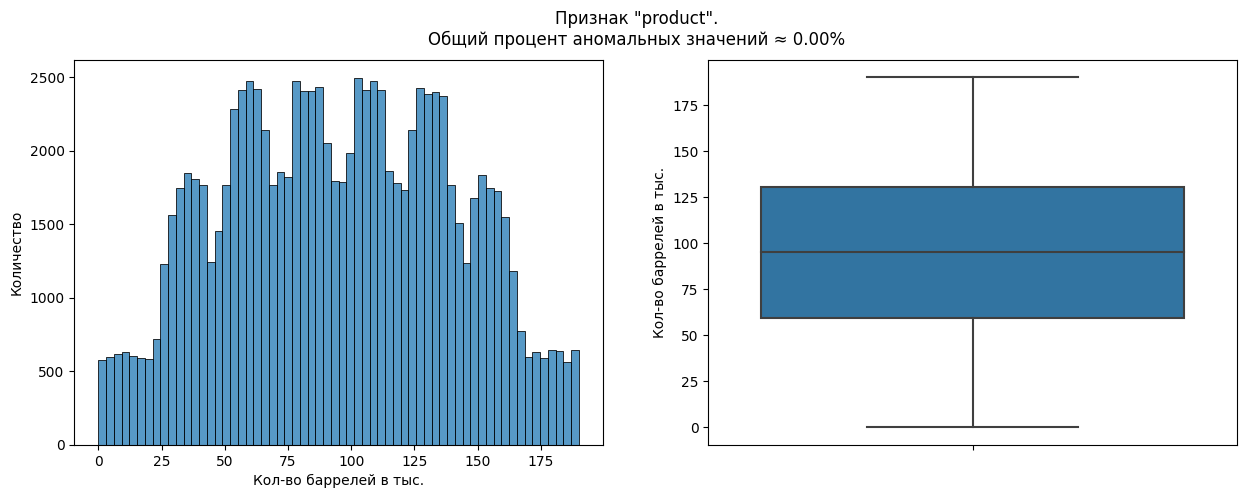

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [9]:
# Вызовем функции и выведем информацию и графики.
i = 0
for df in [geo_data_0, geo_data_1, geo_data_2]:
    get_eda_data(df, f'Регион {i}')
    get_eda_info(df.drop(columns='id'))
    print('~' * 70)
    i += 1

- Дополнительно проверим верность оценки корреляции коэффициентом Кендалла, который более устойчив к выбросам и различным видам распределений.

In [ ]:
# Проверим верность оценки корреляции коэффициентом Кендалла.
for df in [geo_data_0, geo_data_1, geo_data_2]:
    display(
        df
        .corr('kendall', numeric_only=True)
        .style
        .background_gradient(cmap='YlOrRd')
        .format(precision=2)
        .set_caption('Матрица корреляции. \n Коэффициенты Кендалла.')
        .set_table_styles(styles)
        )
    print('\n')

,f0,f1,f2,product
f0,1.00,-0.29,-0.00,0.09
f1,-0.29,1.00,0.00,-0.12
f2,-0.00,0.00,1.00,0.33
product,0.09,-0.12,0.33,1.00


,f0,f1,f2,product
f0,1.00,0.12,-0.00,-0.09
f1,0.12,1.00,-0.00,-0.02
f2,-0.00,-0.00,1.00,0.87
product,-0.09,-0.02,0.87,1.00


,f0,f1,f2,product
f0,1.00,0.00,0.00,-0.00
f1,0.00,1.00,0.00,-0.00
f2,0.00,0.00,1.00,0.30
product,-0.00,-0.00,0.30,1.00


- Дополнительно выведем точную оценку корреляции Пирсона предиктора `f2` и целевого признака `product` "Региона 1" `geo_data_1`.

In [ ]:
print('Коэфф. корреляции Пирсона признаков "f2" и "product" Региона 1: ' +
      f"{geo_data_1['f2'].corr(geo_data_1['product']):.6f}.")

Коэфф. корреляции Пирсона признаков "f2" и "product" Региона 1: 0.999397.


### Общая информация о данных. Выводы.
#### Информация о составе датафреймов.
- Каждый из трёх наборов данных представлен четырьмя непрерывными количественными признаками, один из которых целевой, и одним номинативным - идентификатором скважины. <br>
- Исключение составляет набор данных по "Региону 1", файл `geo_data_1`, в котором значения признака `f2` и целевого `product`, возможно, были сгенерированы один из другого и, в связи с этим, представляются дискретными. <br>

#### Признаки.
- Предикторы:
  - `f0`, `f1`, `f2`;
- Целевой признак:
  - `product`.
- Дополнительные:
  - `id` - идентификатор скважины:<br>
  Т.к. конкретные скважины в рамках данной работы не важны и идентификаторы не несут информации для обучения моделей, удалим уникальные идентификаторы `id` скважин после предобработки.

#### Задача построения модели.
- Задача построения предиктивной модели сводится к линейной регрессии, "обучению с учителем", т.к.:
  - Целевой признак определён.
  - Тип целевого признака: количественный, непрерывный.

#### Пропуски в данных.
- Пропусков в данных не обнаружено.
- Т.к. нулевых значений в данных немного, оставим их без изменений.

#### Аномалии в данных.
- Т.к. аномальных значений в данных ничтожно мало, оставим их без изменений.

#### Дубликаты в данных.
  - Явных дубликатов в данных не обнаружено.
  - В данных обнаружены дубликаты в уникальных идентификаторах скважин - `id`:
    - Регион 0: 10 дубликатов;
    - Регион 1: 4 дубликата;
    - Регион 2: 4 дубликата.<br>
    
    Объекты с дубликатами необходимо обработать.

#### Распределения признаков.
  - `Регион 0`:
    - Признаки `f0`, `f1` и `product` распределены мультимодально.
    - Признак `f2` распределен приближенно нормально с небольшим кол-вом аномальных значений.
  - `Регион 1`:
    - Признак `f0` распределен бимодально.
    - Признак `f1` распределен нормально.
    - Признаки `f2` и `product` распределены равномерно.
  - `Регион 2`:
    - Признаки `f0`, `f1` и `f2` распределены приближенно нормально с небольшими кол-вами аномальных значений.
    - Признак `product` распределен мультимодально.<br>

    Признаки необходимо смасштабировать.

#### Корреляция признаков / мультиколлинеарность.
  - `Регион 0`:
    - Заметна слабая корреляция признаков `f0` и `f1`.
    - Заметна корреляция всех признаков с целевым.
    - Наиболее сильно коррелирует с целевым признак `f2`.
  - `Регион 1`:
    - Заметна слабая корреляция признаков `f0` и `f1`.
    - Заметна почти полная корреляция признака `f2` и целевого `product`, что еще раз косвенно указывает на синтетическую природу значений одного из или обоих признаков. В данном случае, т.к. один предиктор полностью объясняет целевой признак, `r^2` квадрат коеффициента корреляции Пирсона будет равен `R^2` коэффициенту детерминации, и оба значения будут приближенно равны `1`.
  - `Регион 2`:
    - Заметна слабая корреляция признака `f2` и целевого `product`.


## Предобработка данных.

### Обработка дубликатов.
Выведем объекты с дубликатами в идентификаторе `id`.

In [ ]:
# Выведем объекты с дубликатами в идентификаторе id.
i = 0
for df in [geo_data_0, geo_data_1, geo_data_2]:
    print(f'\033[1mРегион {i}:\033[0m')
    display(df.loc[df['id'].duplicated(keep=False)].sort_values(by='id'))
    print('~' * 70)
    i += 1

Регион 0:


,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Регион 1:


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Регион 2:


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#### Удаление дубликатов.
Т.к. идентификаторы скважин должны быть уникальнымии, объектов с дубликатами `id` относительно мало - 0.01% от кол-ва объектов и менее, а природу дубликатов установить невозможно, во избежание учёта
ошибочно введённых данных удалим оригиналы и дубликаты объектов с дублированными идентификаторами `id` и сбросим индексы.<br>
Проверим результат.

In [ ]:
# Удалим объекты с дубликатами идентификатора id и проверим результат.
i = 0
for df in [geo_data_0, geo_data_1, geo_data_2]:
    orig_shape = df.shape[0]
    df.drop_duplicates(subset='id', keep=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(f'\033[1m \nИз датафрейма "geo_data_{i}" удален(о)' +
          f' {orig_shape - df.shape[0]} объект(ов).\033[0m\n')
    print('Информация о составе изменённого датафрейма:')
    df.info()
    print('~' * 70)
    i += 1

 
Из датафрейма "geo_data_0" удален(о) 20 объект(ов).

Информация о составе изменённого датафрейма:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99980 entries, 0 to 99979
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99980 non-null  object 
 1   f0       99980 non-null  float64
 2   f1       99980 non-null  float64
 3   f2       99980 non-null  float64
 4   product  99980 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 
Из датафрейма "geo_data_1" удален(о) 8 объект(ов).

Информация о составе изменённого датафрейма:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99992 non-null  object 
 1   f0       99992 non-null  float64
 2   f1       99992 non-null  float64
 3   f

### Удаление неинформативного признака.
Т.к. конкретные скважины в рамках данной работы не важны и идентификаторы не несут информации для обучения моделей, удалим уникальные идентификаторы скважин.

In [ ]:
# Удалим уникальные идентификаторы скважин.
i = 0
for df in [geo_data_0, geo_data_1, geo_data_2]:
    df.drop('id', axis=1, inplace=True)
    print(f'\033[1mИнформация о составе изменённого датафрейма Регион {i}:' +
          '\033[0m\n')
    df.info()
    print('~' * 70)
    i += 1

Информация о составе изменённого датафрейма Регион 0:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99980 entries, 0 to 99979
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       99980 non-null  float64
 1   f1       99980 non-null  float64
 2   f2       99980 non-null  float64
 3   product  99980 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Информация о составе изменённого датафрейма Регион 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99992 entries, 0 to 99991
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       99992 non-null  float64
 1   f1       99992 non-null  float64
 2   f2       99992 non-null  float64
 3   product  99992 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Предобработка данных. Выводы.
- Были удалены дубликаты и оригиналы объектов с повторяющимися `id`.
- Был удалён признак с уникальными идентификаторами скважин `id`.

## Обучение и проверка модели.

### Создание функции.
Создадим функцию которая:
- Примет
  - датафрейм;
  - название целевого признака;
  - долю валидационной выборки.
- Разделит данные на выборки с выводом размерностей для проверки.
- Смасштабирует признаки и обучит модель.
- Выдаст
  - предсказания и правильные ответы на валидационной выборке;
  - средний запас предсказанного сырья для региона;
  - RMSE модели;
  - R2 коэффициент детерминации.

In [ ]:
geo_data_0

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99975,0.971957,0.370953,6.075346,110.744026
99976,1.392429,-0.382606,1.273912,122.346843
99977,1.029585,0.018787,-1.348308,64.375443
99978,0.998163,-0.528582,1.583869,74.040764


In [ ]:
# Функция вывода валидационных ответов, предсказаний, RMSE.
def split_scale_pred(df=pd.DataFrame, target=str, test_size=float,
                     model_name=LinearRegression, scaler_name=StandardScaler):

    X_train, X_val, y_train, y_val = (
        train_test_split(df.drop(target, axis=1),
                         df[target],
                         test_size=test_size,
                         random_state=seed)
        )

    # Выведем размерности и проценты результирующих выборок.
    display(
        pd.DataFrame(
            index=['Исходный датафрейм',
                   'Обучающая выборка',
                   'Валидационная выборка'],
            columns=['Предикторы',
                     'Целевой признак',
                     'Процент от общего количества объектов'],
            data=[[df.drop(target, axis=1).shape, df[target].shape[0], '100%'],
                  [X_train.shape, y_train.shape[0],
                   f'{y_train.shape[0] / df[target].shape[0]:.1%}'],
                  [X_val.shape, y_val.shape[0],
                   f'{y_val.shape[0] / df[target].shape[0]:.1%}']]
            )
        .style
        .set_caption(f'Размерности выборок после разделения.')
        .set_table_styles(styles)
        )

    print('\n')

    # Смасштабируем данные, обучим модель.
    model = Pipeline(steps=[('Стандартизация.', scaler_name()),
                            ('Линейная регрессия.', model_name())])
    model.fit(X_train, y_train)

    # Получим предикт и вычислим оценки модели.
    y_preds = pd.Series(model.predict(X_val))
    y_true = y_val.reset_index(drop=True)
    rmse = mean_squared_error(y_val, y_preds, squared=False)
    r2 = r2_score(y_val, y_preds)

    # Выведем оценки модели и другие параметры.
    display(pd.DataFrame(
        index=['Значение:'],
        data={'Средний запас предсказанного сырья:' : f'{y_preds.mean():.2f}',
              'Разница между суммарными реальным и предск. запасами в %:' :
              f'{abs((y_preds.sum() - y_val.sum())/y_val.sum()):.2%}',
              'RMSE модели:' : f'{rmse:.2f}',
              'R2 коэфф. детерминации' : f'{r2:.2f}'}
        )
    .style
    .set_caption('Валидационная выборка.')
    .set_table_styles(styles)
    )

    return y_true, y_preds

### Обучение и проверка модели.
- Вызовем функцию и
  - разделим данные на выборки в соотношении 75:25;
  - смасштабируем признаки;
  - обучим модель, сохранив предсказания и правильные ответы на валидационной выборке и RMSE модели;
  - выведем средний запас предсказанного сырья для региона и RMSE модели;
  - сохраним предсказания и правильные ответы на валидационной выборке.

In [ ]:
# Вызовем функцию и получим данные.
i = 0
for df in [geo_data_0, geo_data_1, geo_data_2]:
    print(f'\n\033[1m\033[4mРегион {i}:\033[0m\n')
    (globals()[f'y{i}_true'],
     globals()[f'y{i}_pred']) = split_scale_pred(df, 'product', .25)
    print('\n\nРеальный и предсказанный запасы сырья сохранены в переменные ' +
          f'"y{i}_true" и "y{i}_pred" соответственно.')
    print('~' * 70)
    i += 1


Регион 0:



,Предикторы,Целевой признак,Процент от общего количества объектов
Исходный датафрейм,"(99980, 3)",99980,100%
Обучающая выборка,"(74985, 3)",74985,75.0%
Валидационная выборка,"(24995, 3)",24995,25.0%


,Средний запас предсказанного сырья:,Разница между суммарными реальным и предск. запасами в %:,RMSE модели:,R2 коэфф. детерминации
Значение:,92.29,0.10%,37.76,0.27




Реальный и предсказанный запасы сырья сохранены в переменные "y0_true" и "y0_pred" соответственно.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Регион 1:



,Предикторы,Целевой признак,Процент от общего количества объектов
Исходный датафрейм,"(99992, 3)",99992,100%
Обучающая выборка,"(74994, 3)",74994,75.0%
Валидационная выборка,"(24998, 3)",24998,25.0%


,Средний запас предсказанного сырья:,Разница между суммарными реальным и предск. запасами в %:,RMSE модели:,R2 коэфф. детерминации
Значение:,69.17,0.01%,0.89,1.00




Реальный и предсказанный запасы сырья сохранены в переменные "y1_true" и "y1_pred" соответственно.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Регион 2:



,Предикторы,Целевой признак,Процент от общего количества объектов
Исходный датафрейм,"(99992, 3)",99992,100%
Обучающая выборка,"(74994, 3)",74994,75.0%
Валидационная выборка,"(24998, 3)",24998,25.0%


,Средний запас предсказанного сырья:,Разница между суммарными реальным и предск. запасами в %:,RMSE модели:,R2 коэфф. детерминации
Значение:,94.82,0.25%,40.13,0.19




Реальный и предсказанный запасы сырья сохранены в переменные "y2_true" и "y2_pred" соответственно.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### Обучение и проверка модели. Выводы.
- Выборки были разделены в соотношении `75`:`25`.
- Была проведена нормализация данных.
- Было проведено обучение моделей линейной регрессии.
- На валидационной выборке были рассчитаны средние запасы предсказанного сырья, а также корень среднеквадратичной ошибки `RMSE` и (выборочный) коэффициент детерминации `R2`.
- Были сохранены предсказания и правильные ответы.
- Регионы с оценками целевой метрики `RMSE` в порядке убывания:
  - `Регион 1` | `geo_data_1`: `RMSE` - `0.89`;
  - `Регион 0` | `geo_data_0`: `RMSE` - `37.76`;
  - `Регион 2` | `geo_data_2`: `RMSE` - `40.13`. <br><br>

- `Регион 0`, `Регион 2`:

  Высокое значение `RMSE` близкое к значению `RMSE` среднего и низкое значение `R2` модели говорят о том, что модель предсказывает не намного лучше константной модели, всегда предсказывающей среднее. <br>
  Этот вывод подтверждает небольшая разница между предсказанным и реальным средним запасов при низком качестве моделей.<br><br>

- `Регион 1`:
  
  Значение `R2` близкое к `1` и низкое значение `RMSE` говорят о почти отсутствующих ошибках предсказаний или о функциональной зависимости признака `f2` и целевого `product`.

## Подготовка к расчёту прибыли.

### Определение констант, указанных в ТЗ.
- Бюджет на разработку скважин в регионе: 10 млрд. р.
- Доход с каждой единицы продукта: 450 тыс. р., т.к. объём указан в тыс. баррелей.
- Исследуемое кол-во скважин: 500.
- Кол-во лучших скважин: 200.
- Порог убыточности региона: 2.5%.
- Кол-во выборок для бутстрэп исследования: 1000.
- Пороги 95% доверительного интервала: (2.5% , 97.5%).

In [ ]:
## Зададим константы для рассчётов.
# Бюджет.
BUDGET = 1e+10
# Доход на единицу (тысячу баррелей).
RPU = 450000
# Исследуемое кол-во скважин.
WELLS_TOTAL = 500
# Кол-во лучших скважин.
WELLS_FINAL = 200
# Порог убыточности региона.
LOSS_THRESHOLD = .025
# Кол-во выборок.
BOOTSTRAP_SAMPLES = 1000
# Пороги 95% доверительного интервала.
CONF_INT_UPP = .975
CONF_INT_LOW = .025

### Расчёт достаточного объёма сырья.
- Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины при 200 скважинах, разрабатываемых в регионе.
- Сравним полученный объём сырья со средним запасом в каждом регионе.

In [ ]:
# Рассчитаем и выведем достаточный объём сырья.
min_product = BUDGET / WELLS_FINAL / RPU
print('Достаточный объём сырья в одной скважине для безубыточной разработки ' +
      f'при {WELLS_FINAL} скважинах, \nразрабатываемых в регионе: ' +
      f'{min_product:.2f} тыс. баррелей.\n\n')

# Сравним полученный объём сырья со средним запасом.
i = 0
comp_list = []
for df in [geo_data_0, geo_data_1, geo_data_2]:
    comp_list.append(
        [f'{round(df["product"].mean(), 2)} тыс. баррелей',
         f'{round(df["product"].mean() - min_product, 2)} тыс. баррелей',
         (df["product"] >= min_product).sum()]
        )
    i += 1

display(pd.DataFrame(
    index=['Средний запас сырья на скважину в регионе:',
           'Разница среднего и мин. безубыточного запаса на скважину:',
           'Кол-во безубыточных скважин в регионе:'],

    columns=['Регион 0', 'Регион 1', 'Регион 2'],
    data=[el for el in zip(*comp_list)]
    )
.style
.set_caption('Сводные данные о кач-ве скважин.')
.set_table_styles(styles))

Достаточный объём сырья в одной скважине для безубыточной разработки при 200 скважинах, 
разрабатываемых в регионе: 111.11 тыс. баррелей.




,Регион 0,Регион 1,Регион 2
Средний запас сырья на скважину в регионе:,92.5 тыс. баррелей,68.82 тыс. баррелей,95.0 тыс. баррелей
Разница среднего и мин. безубыточного запаса на скважину:,-18.61 тыс. баррелей,-42.29 тыс. баррелей,-16.11 тыс. баррелей
Кол-во безубыточных скважин в регионе:,36576,16536,38173


### Подготовка к рассчёту прибыли. Выводы.
- Были заданы константы в соответствии с ТЗ:
  - `BUDGET` - бюджет на регион;
  - `RPU` - доход с тысячи баррелей;
  - `WELLS_TOTAL` - кол-во рассматриваемых скважин в регионе;
  - `WELLS_FINAL` - кол-во отобранных скважин в регионе;
  - `LOSS_THRESHOLD` - порог убыточности региона;
  - `BOOTSTRAP_SAMPLES` - кол-во выборок для бутстрэп исследования;
  - `CONF_INT_UPP`/`CONF_INT_LOW` - пороги `95%` доверительного интервала.
- Был рассчитан достаточный объём сырья для безубыточной разработки новой скважины: `~111` тыс. баррелей.
- Было произведено сравнение достаточного для безубыточной разработки и средних по регионам объёмов сырья. <br>
  - Во всех регионах средний объём сырья на скважину значительно меньше объёма достаточного для безубыточной разработки[<sup>1</sup>](#fn1). Не все сочетания скважин прибыльны.
  - В каждом регионе достаточно скважин с объёмами сырья равными или превышающими достаточный[<sup>1</sup>](#fn1)&nbsp; из которых можно выбрать `n` лучших.
  - Регионы с минимальной разницей среднего запаса и запаса достаточного для безубыточной разработки[<sup>1</sup>](#fn1)&nbsp; в порядке убывания:
    - `Регион 2` : `-16.11` тыс. баррелей.<br> Более `38 тыс.` безубыточных скважин;
    - `Регион 1` : `-18.61` тыс. баррелей.<br> Более `36 тыс.` безубыточных скважин;
    - `Регион 0` : `-42.29` тыс. баррелей.<br> Более `16 тыс.` безубыточных скважин.<br><br>




> <span id="fn1"><sup><u>1</u></sup> при разработке `200` скважин.</span>



## Расчёт прибыли и рисков

### Функция расчёта прибыли.
Зададим функцию расчёта прибыли с 200 лучших скважин по региону.

In [ ]:
# Функция расчёта прибыли с 200 лучших скважин по региону.
def get_profit(pred, true):
    top_pred = pred.sort_values(ascending=False)
    top_true = true[top_pred.index][:WELLS_FINAL]
    profit = round(top_true.sum() * RPU - BUDGET)
    return profit

С учётом заданных в ТЗ параметров создадим функцию, которая
- техникой `Bootstrap` создаст 1000 выборок (по 500 скважин) с возвращением элементов, чтобы найти распределение прибыли;
- для этого распределения рассчитает
  - среднюю прибыль,
  - 95%-й доверительный интервал,
  - риск убытков как долю отрицательных объектов от всех объектов выборки.

In [ ]:
# Функция расчета средней прибыли, 95% доверительного интервала и доли
# отрицательной прибыли.
def get_estimates(pred=pd.Series, true=pd.Series,
                  header='Выходные параметры.'):

    # Установим значение генератора.
    state = np.random.RandomState(42)
    # Объявим список для сбора прибыли.
    profit = []

    # Методом bootstrap переберём выборки, вычислим и запишем прибыль
    # для каждой.
    print('\nНачало работы...\n')
    for _ in trange(BOOTSTRAP_SAMPLES):
        true_sample = true.sample(WELLS_TOTAL,
                                  replace=True,
                                  random_state=state)
        pred_sample = pred[true_sample.index]
        profit.append(get_profit(pred_sample, true_sample))

    # Вычислим среднюю прибыль, дов. интервал, долю отрицательной прибыли
    # в распределении.
    profit_avg = round(np.mean(profit))
    lower = f'{round(np.quantile(profit, CONF_INT_LOW)):,}'.replace(",", " ")
    upper = f'{round(np.quantile(profit, CONF_INT_UPP)):,}'.replace(",", " ")
    risk_prob = sum(np.array(profit) < 0) / len(profit)

    # Выведем данные.
    print('\n')
    display(pd.DataFrame(
        index=['Значение:'],
        data={'Средняя прибыль, руб.:' : profit_avg,
              '95% доверительный интервал, руб.:' : f'({lower} , {upper})',
              'Риск убытков:' : f'{risk_prob:.2%}'}
        )
        .style
        .format(thousands=' ')
        .set_caption(header)
        .set_table_styles(styles)
        )

    print('~' * 70)

    return profit_avg, lower, upper, risk_prob

### Рассчёт средней прибыли, доверительного интервала и риска убытков.
- Для каждого региона с применением метода `Bootstrap`
  - выведем среднюю прибыль,
  - `95%-й` доверительный интервал,
  - риск убытков (убыток - отрицательная прибыль).
- Выведем и отсортируем по убыванию прибыльности регионы, риск убытков при разработке которых ниже порога убыточности, указанного в ТЗ на уровне `2.5%`.

In [ ]:
# Выведем данные по всем регионам.
top_regions = {}
for i in range(3):
    (profit_avg, lower,
     upper, risk_prob) = get_estimates(globals()[f'y{i}_pred'],
                                       globals()[f'y{i}_true'],
                                       f'Регион {i}.')

    if risk_prob < LOSS_THRESHOLD:
        top_regions.update({f'Регион {i}' : [profit_avg,
                                             f'({lower} , {upper})',
                                             f'{risk_prob:.2%}']}
            )
print('\n' * 3)

# Выведем регионы отвечающие критериям.
display(pd.DataFrame(
    index=top_regions.keys(),
    columns=['Средняя прибыль, руб.:' ,
             '95% доверительный интервал, руб.:',
             'Риск убытков:'],
    data=top_regions.values()
    )
.sort_values(by='Средняя прибыль, руб.:', ascending=False)
.style
.format(thousands=' ')
.set_caption('Регионы удовлетворяющие критериям ' +
             '\nв порядке убывания прибыли.')
.set_table_styles(styles))


Начало работы...



100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 648.44it/s]

,"Средняя прибыль, руб.:","95% доверительный интервал, руб.:",Риск убытков:
Значение:,429 728 281,"(-130 171 033 , 975 528 787)",6.90%


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало работы...



100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 696.78it/s]

,"Средняя прибыль, руб.:","95% доверительный интервал, руб.:",Риск убытков:
Значение:,539 151 485,"(135 179 802 , 954 368 710)",0.40%


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало работы...



100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 704.33it/s]

,"Средняя прибыль, руб.:","95% доверительный интервал, руб.:",Риск убытков:
Значение:,386 922 413,"(-187 982 203 , 893 248 484)",8.80%


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~






,"Средняя прибыль, руб.:","95% доверительный интервал, руб.:",Риск убытков:
Регион 1,539 151 485,"(135 179 802 , 954 368 710)",0.40%


### Расчёт прибыли и рисков. Выводы:
- Для каждого региона с применением метода `Bootstrap` были найдены
  - средняя прибыль,
  - `95%-й` доверительный интервал,
  - риск убытков.
- Результирующие распределения приближенно нормальны и визульно соответствуют полученным значениям метрик.

- Найден один регион с риском убытков ниже порога убыточности `2.5%`. <br>
Данный регион имеет наибольшую среднюю прибыль. <br>
Параметры данного региона:
  - `Регион 1` | `geo_data_1.csv`.
  - Средняя прибыль: `~539 млн.руб`.
  - `95%` доверительный интервал: `(~135 млн.руб. , ~954 млн.руб.)`.
  - Риск убытков: `0.4%`.

## Общие выводы:
### Моделирование.
Задача построения предиктивной модели была сведена к линейной регрессии, "обучению с учителем", т.к.:
- Целевой признак определён.
- Тип целевого признака: количественный, непрерывный.

### Информация о составе датафреймов.
- Каждый из трёх наборов данных представлен четырьмя непрерывными количественными признаками, один из которых целевой, и одним номинативным - идентификатором скважины.
> Исключение составляет набор данных по `Региону 1`, файл `geo_data_1.csv`, в котором значения признака `f2` и целевого `product`, возможно, были сгенерированы одни из других и в связи с этим представляются дискретными и почти полностью коррелируют. В данном случае, т.к. один предиктор полностью объясняет целевой признак, `r^2` квадрат коеффициента корреляции Пирсона равен `R^2` коэффициенту детерминации, и оба значения будут приближенно равны `1`.
- Признаки:
  - Предикторы: `f0`, `f1`, `f2`;
  - Целевой признак: `product`.
  - Дополнительные: `id` - идентификатор скважины.

- Пропуски в данных:
  - Пропусков в данных не обнаружено.
  - Нулевые значения были оставлены без изменений из-за их небольшого кол-ва.
- Аномалии в данных:
  - Аномальные значения были оставлены без изменений из-за их ничтожного кол-ва.
- Дубликаты в данных:
  - Явных дубликатов в данных не обнаружено.
  - В данных были обнаружены и, во избежание учёта ошибочных данных, удалены вместе с оригиналами объекты с дубликатами в уникальных идентификаторах скважин - `id`.
- Неинформативный в рамках данной работы признак `id`, содержащий идентификаторы, был удалён.

### Обучение и проверка модели.
- Выборки были разделены в соотношении `75`:`25`.
- Была проведена нормализация данных.
- Было проведено обучение моделей линейной регрессии.
- На валидационной выборке были рассчитаны средние запасы предсказанного сырья, а также корень среднеквадратичной ошибки `RMSE` и (выборочный) коэффициент детерминации `R2`.
- Регион с низшей оценкой целевой метрики `RMSE`:
  - `Регион 1` | `geo_data_1`: `RMSE` - `0.89`.<br>
  
  Значение `R2` близкое к `1` и низкое значение `RMSE` говорят о почти отсутствующих ошибках предсказаний и о функциональной зависимости признака `f2` и целевого `product`.

### Расчёт прибыли, 95%-го доверительного интервала и рисков убытков.
- Были заданы константы в соответствии с ТЗ:
  - `BUDGET` - бюджет на регион;
  - `RPU` - доход с тысячи баррелей;
  - `WELLS_TOTAL` - кол-во рассматриваемых скважин в регионе;
  - `WELLS_FINAL` - кол-во отобранных скважин в регионе;
  - `LOSS_THRESHOLD` - порог убыточности региона;
  - `BOOTSTRAP_SAMPLES` - кол-во выборок для бутстрэп исследования;
  - `CONF_INT_UPP`/`CONF_INT_LOW` - пороги `95%` доверительного интервала.
- Был рассчитан достаточный объём сырья для безубыточной разработки новой скважины: `~111` тыс. баррелей.
- Во всех регионах средний объём сырья на скважину значительно меньше объёма достаточного для безубыточной разработки[<sup>1</sup>](#fn1). Не все сочетания скважин прибыльны.
- В каждом регионе достаточно скважин с объёмами сырья равными или превышающими достаточный[<sup>1</sup>](#fn1)&nbsp; из которых можно выбрать `n` лучших.
- Регион с минимальной разницей среднего запаса и запаса достаточного для безубыточной разработки при разработке 200 скважин:
    - `Регион 2` : `-16.11` тыс. баррелей.<br> Более `38 тыс.` безубыточных скважин.<br><br>

- Для каждого региона с применением метода `Bootstrap` были найдены
  - средняя прибыль,
  - `95%-й` доверительный интервал,
  - риск убытков.

### Регион, в котором рекомендуется бурить новые скважины: `Регион 1`.
- Риск убытков в данном регионе ниже порога убыточности `2.5%`.
- Данный регион имеет наибольшую среднюю прибыль.
- Параметры данного региона:
  - `Регион 1` | `geo_data_1.csv`.
  - Средняя прибыль: `~539 млн.руб`.
  - `95%` доверительный интервал: `(~135 млн.руб. , ~954 млн.руб.)`.
  - Риск убытков: `0.4%`.